![lop](../../images/logo_diive1_128px.png)

<span style='font-size:40px; display:block;'>
<b>
    Histogram plot
</b>
</span>

---
**Notebook version**: `1` (21 Aug 2024)  
**Author**: Lukas Hörtnagl (holukas@ethz.ch)

</br>

# **Description**

- Plot histogram of a time series
- Includes option to
    - superimpose z-score limits, including their respective value, calculated from input series
    - highlight bin with peak distribution (most counts)

</br>

# **Imports**

In [1]:
import importlib.metadata
from datetime import datetime
import pandas as pd
import warnings
warnings.simplefilter("ignore", UserWarning)
from diive.configs.exampledata import load_exampledata_parquet
from diive.core.plotting.histogram import HistogramPlot
version_diive = importlib.metadata.version("diive")
print(f"diive version: v{version_diive}")

diive version: v0.85.0


</br>

# **Load example data**

In [2]:
data_df = load_exampledata_parquet()
series = data_df['Tair_f'].copy()
series

Loaded .parquet file L:\Sync\luhk_work\20 - CODING\21 - DIIVE\diive\diive\configs\exampledata\exampledata_PARQUET_CH-DAV_FP2022.5_2013-2022_ID20230206154316_30MIN.parquet (0.051 seconds).
    --> Detected time resolution of <30 * Minutes> / 30min 


TIMESTAMP_MIDDLE
2013-01-01 00:15:00   -1.618
2013-01-01 00:45:00   -1.630
2013-01-01 01:15:00   -1.644
2013-01-01 01:45:00   -1.657
2013-01-01 02:15:00   -0.567
                       ...  
2022-12-31 21:45:00    3.463
2022-12-31 22:15:00    5.283
2022-12-31 22:45:00    5.537
2022-12-31 23:15:00    4.963
2022-12-31 23:45:00    6.490
Freq: 30min, Name: Tair_f, Length: 175296, dtype: float64

</br>

# **Plot histogram**

## With z-scores, peak highlight, show counts and info text in equally-spaced bins
- z-scores are shown as vertical lines, in combination with the corresponding value based on the input time series
- This example shows data in 20 equally-spaced bins

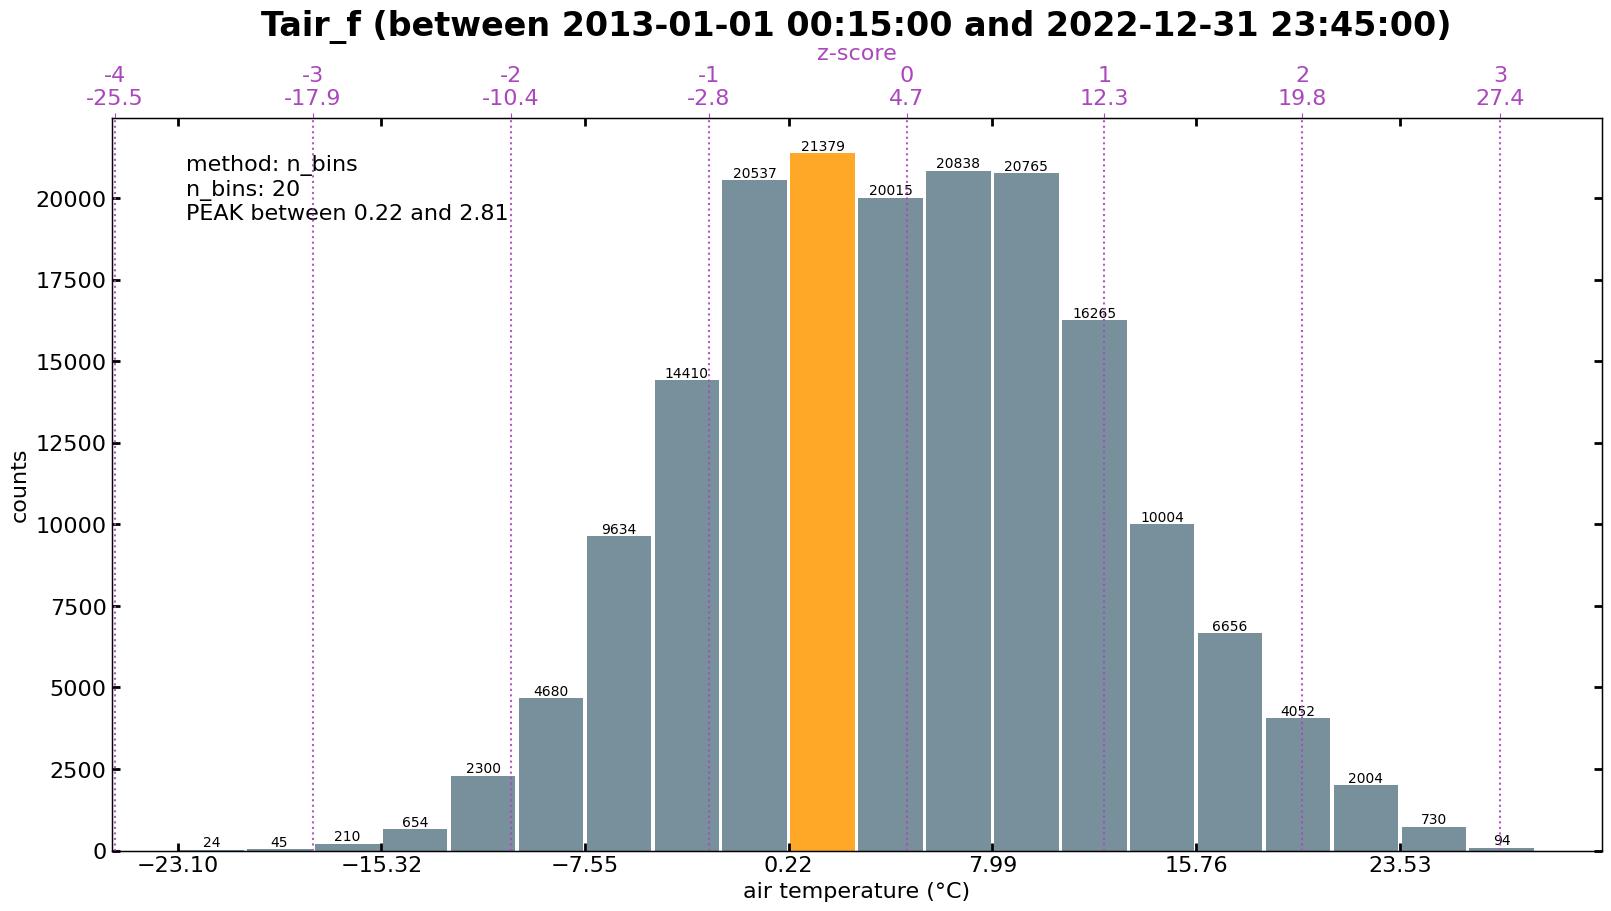

In [3]:
hist = HistogramPlot(
    s=series,
    method='n_bins',
    n_bins=20,    
    xlabel='air temperature (°C)',
    highlight_peak=True,
    show_zscores=True,
    show_zscore_values=True,
    show_counts=True,
    show_info=True,
    show_grid=False,
    show_title=True    
)
hist.plot()

</br>

## With peak highlight, show counts and info text in 6 pre-defined bins
- **Important**:
    - when `n_bins` is a `list`, specific bins are used
    - plotting is based on Matplotlib `hist` and bins can be defined in a list following the Matplotlib convention, [see docs for the `bin` parameter here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib-pyplot-hist)
    - for 6 pre-defined bins, 7 bins must be provided, from the Matplotlib docs:
 
> All but the last (righthand-most) bin is half-open. In other words, if bins is `[1, 2, 3, 4]` then the first bin is [1, 2) (including 1, but excluding 2) and the second [2, 3). The last bin, however, is [3, 4], which includes 4.

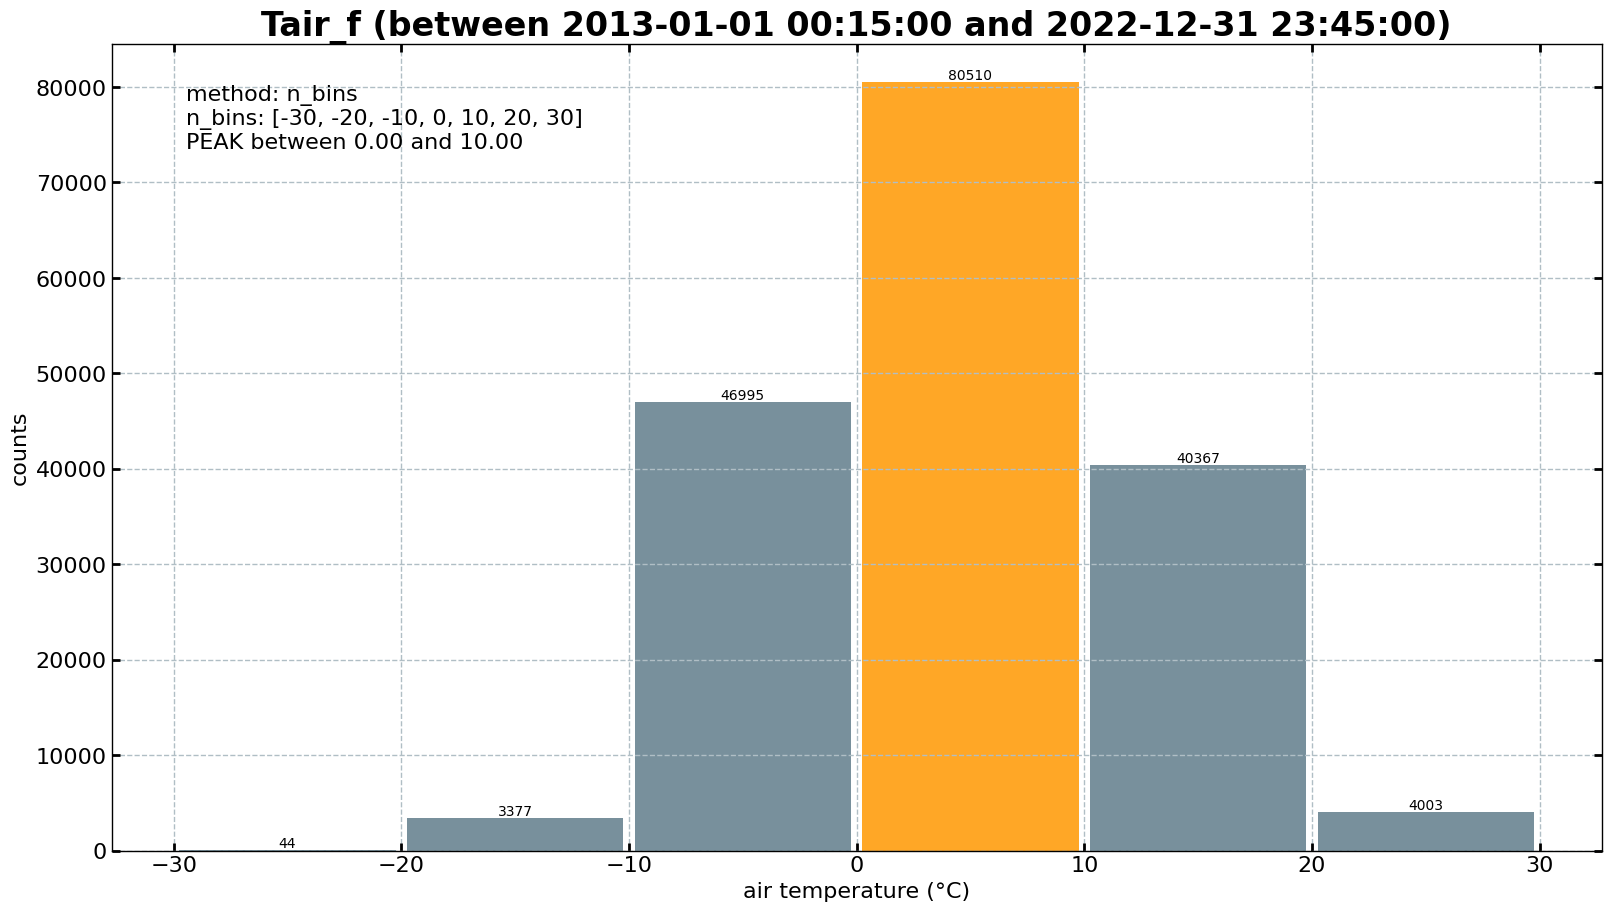

In [4]:
hist = HistogramPlot(
    s=series,
    method='n_bins',
    n_bins=[-30, -20, -10, 0, 10, 20, 30],
    xlabel='air temperature (°C)',
    highlight_peak=True,
    show_zscores=False,
    show_counts=True,
    show_info=True
)
hist.plot()

</br>

## Simple
- This example shows data in 20 equally-spaced bins

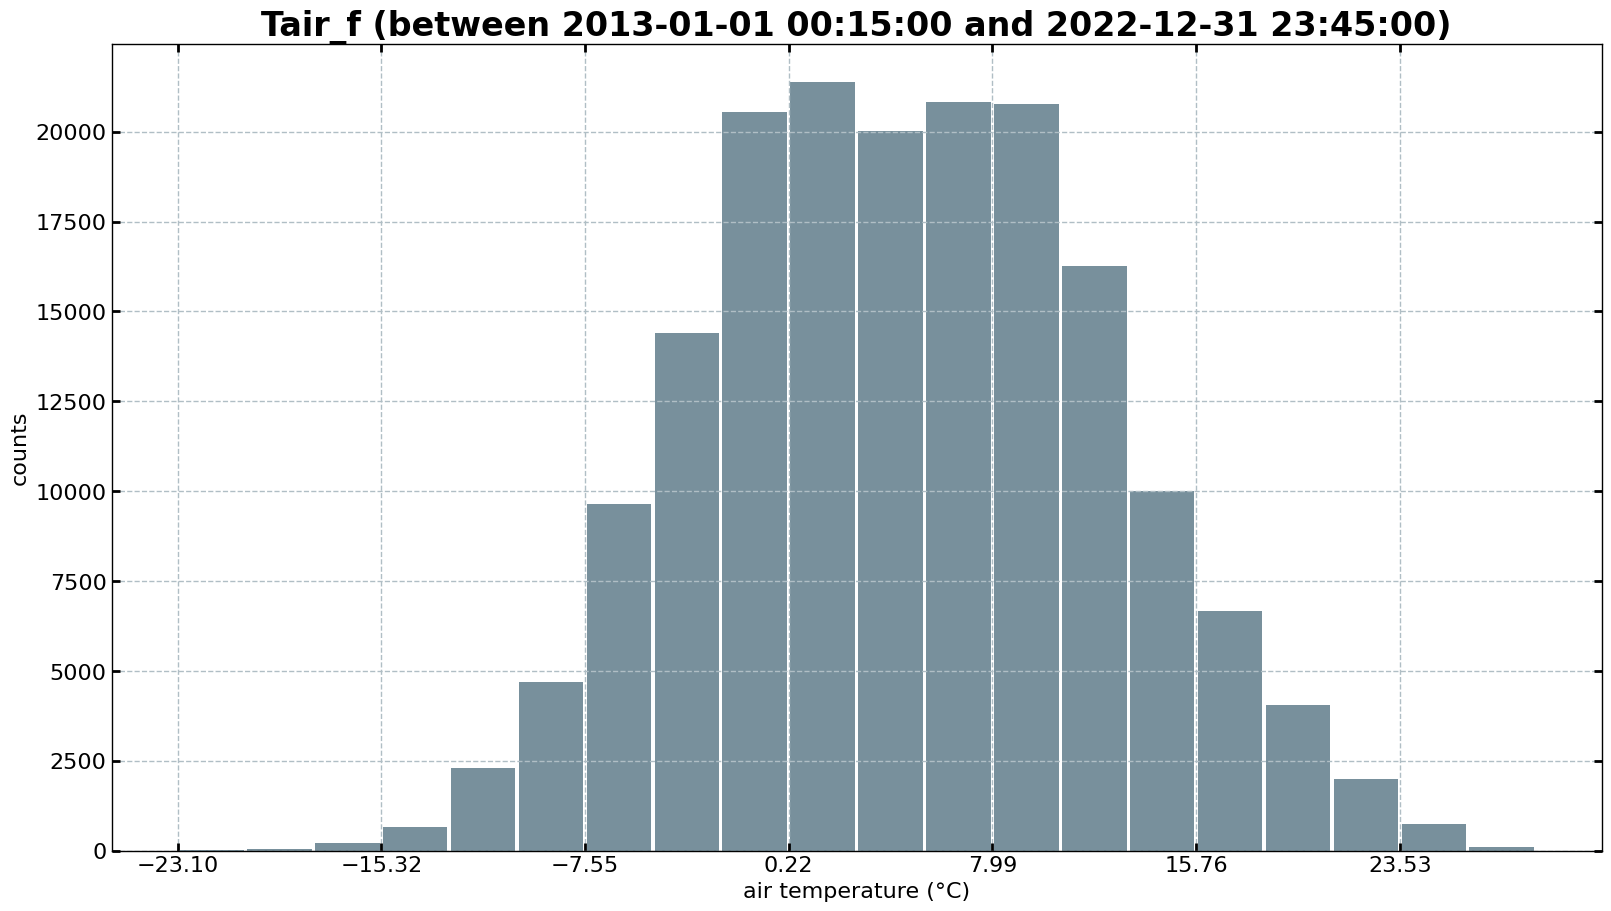

In [5]:
hist = HistogramPlot(
    s=series,
    method='n_bins',
    n_bins=20,    
    xlabel='air temperature (°C)',
    highlight_peak=False,
    show_zscores=False,
    show_counts=False,
    show_info=False
)
hist.plot()

</br>

# **End of notebook**

In [6]:
dt_string = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Finished {dt_string}")

Finished 2025-01-25 01:43:04
